<a href="https://colab.research.google.com/github/ahmedabl/Todo/blob/main/Cat%20Vs%20Dog%20CNN%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tongpython/cat-and-dog")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'cat-and-dog' dataset.
Path to dataset files: /kaggle/input/cat-and-dog


In [13]:
!kaggle datasets download tongpython/cat-and-dog


Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
cat-and-dog.zip: Skipping, found more recently modified local copy (use --force to force download)


In [14]:
import zipfile

zip_ref = zipfile.ZipFile('/content/cat and dog.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [15]:
import os
print(os.listdir('/content'))


['.config', 'kaggle.json', 'test_set', 'training_set', 'cat and dog.zip', '.ipynb_checkpoints', 'sample_data']


In [16]:
import os
print(os.listdir('/content/training_set/training_set'))
print(os.listdir('/content/test_set/test_set'))


['cats', 'dogs']
['cats', 'dogs']


In [17]:
import os
print(os.listdir('/content/training_set/training_set/dogs'))
print(os.listdir('/content/training_set/training_set/cats'))
print(os.listdir('/content/test_set/test_set/dogs'))
print(os.listdir('/content/test_set/test_set/cats'))



['dog.2758.jpg', 'dog.2450.jpg', 'dog.3049.jpg', 'dog.1007.jpg', 'dog.2848.jpg', 'dog.2077.jpg', 'dog.651.jpg', 'dog.464.jpg', 'dog.2373.jpg', 'dog.490.jpg', 'dog.487.jpg', 'dog.767.jpg', 'dog.434.jpg', 'dog.2439.jpg', 'dog.3099.jpg', 'dog.3763.jpg', 'dog.1385.jpg', 'dog.3543.jpg', 'dog.1532.jpg', 'dog.3425.jpg', 'dog.255.jpg', 'dog.2699.jpg', 'dog.1344.jpg', 'dog.942.jpg', 'dog.1843.jpg', 'dog.636.jpg', 'dog.3967.jpg', 'dog.2088.jpg', 'dog.73.jpg', 'dog.1235.jpg', 'dog.2233.jpg', 'dog.1448.jpg', 'dog.3913.jpg', 'dog.2409.jpg', 'dog.2292.jpg', 'dog.779.jpg', 'dog.389.jpg', 'dog.449.jpg', 'dog.1164.jpg', 'dog.845.jpg', 'dog.3344.jpg', 'dog.2546.jpg', 'dog.3006.jpg', 'dog.3158.jpg', 'dog.1958.jpg', 'dog.570.jpg', 'dog.521.jpg', 'dog.2119.jpg', 'dog.1832.jpg', 'dog.1773.jpg', 'dog.3524.jpg', 'dog.300.jpg', 'dog.2326.jpg', 'dog.2648.jpg', 'dog.1695.jpg', 'dog.3687.jpg', 'dog.3666.jpg', 'dog.445.jpg', 'dog.2209.jpg', 'dog.3890.jpg', 'dog.2159.jpg', 'dog.2616.jpg', 'dog.2238.jpg', 'dog.3646.

In [18]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [71]:
import tensorflow as tf

train_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/training_set/training_set',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)


Found 8005 files belonging to 2 classes.


In [72]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/test_set/test_set',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

Found 2023 files belonging to 2 classes.


In [73]:
# Normalize
def process(image, label):
    image = tf.cast(image/255. , tf.float32)
    return image, label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

In [74]:
# create CNN Model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [75]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [76]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [77]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=val_ds, epochs=10)


Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 34s 110ms/step - accuracy: 0.6031 - loss: 0.8546 - val_accuracy: 0.5047 - val_loss: 1.7294
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 93ms/step - accuracy: 0.7260 - loss: 0.5494 - val_accuracy: 0.6762 - val_loss: 0.6428
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.7809 - loss: 0.4570 - val_accuracy: 0.7341 - val_loss: 0.5778
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.8462 - loss: 0.3460 - val_accuracy: 0.7474 - val_loss: 0.5944
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - accuracy: 0.8847 - loss: 0.2608 - val_accuracy: 0.7528 - val_loss: 0.6994
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.9254 - loss: 0.1757 - val_accuracy: 0.7489 - val_loss: 0.6961
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 89ms/step - accuracy: 0.9559 - loss: 0.1158 - val_accuracy: 0.7464 - val_loss: 0.7674
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - accuracy: 0.9562 - loss: 0.1055 -

In [78]:
from tensorflow.keras import layers

data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))


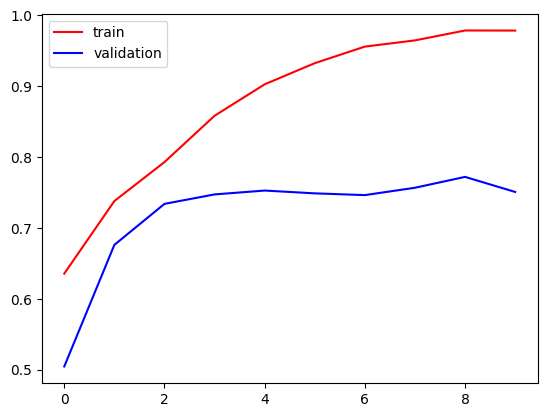

In [79]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'],color='red',label='train')
plt.plot(model.history.history['val_accuracy'],color='blue',label='validation')
#plt.xlabel('# epochs')
#plt.ylabel('loss')
plt.legend()
plt.show()

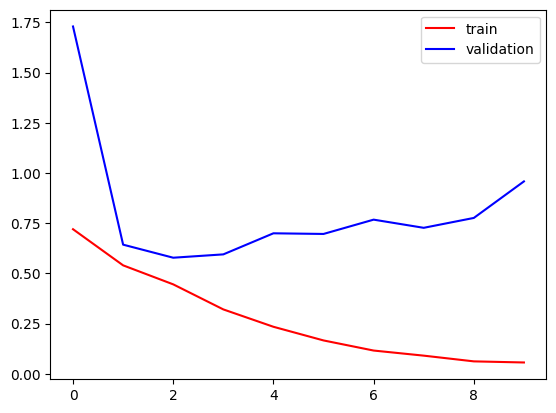

In [80]:
plt.plot(model.history.history['loss'],color='red',label='train')
plt.plot(model.history.history['val_loss'],color='blue',label='validation')
#plt.xlabel('# epochs')
#plt.ylabel('loss')
plt.legend()
plt.show()

In [81]:
test_loss, test_acc = model.evaluate(val_ds)
print(f"✅ Model Accuracy: {test_acc*100:.2f}%")
print(f"📉 Model Loss: {test_loss:.4f}")


64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.7444 - loss: 0.9471
✅ Model Accuracy: 75.09%
📉 Model Loss: 0.9578


In [82]:
import cv2

In [95]:
test_img = cv2.imread('/content/test_set/test_set/cats/cat.4080.jpg')

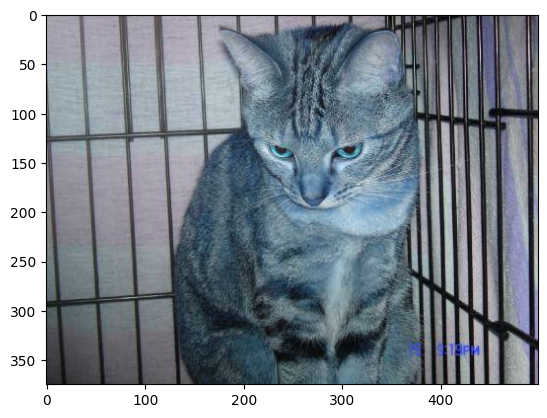

In [96]:
plt.imshow(test_img)

In [97]:
test_img.shape

(375, 499, 3)

In [98]:
test_img = cv2.resize(test_img,(256,256))

In [99]:
test_input = test_img.reshape((1,256,256,3))

In [100]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[0.]], dtype=float32)

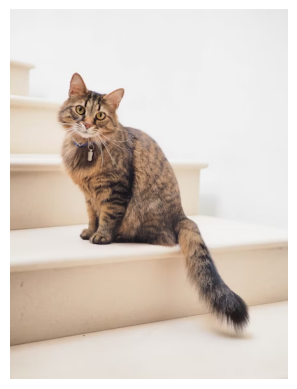

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
🐱 Prediction: Cat
Raw model output: 0.2274


In [105]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 🖼️ Load your image
test_img_path = '/content/catt.avif'  # 👈 change path as needed

# Read and preprocess image
test_img = cv2.imread(test_img_path)
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
plt.imshow(test_img)
plt.axis('off')
plt.show()

# Resize and normalize
test_img = cv2.resize(test_img, (256, 256))
test_input = test_img / 255.0   # normalize
test_input = np.expand_dims(test_input, axis=0)  # shape: (1, 256, 256, 3)

# 🧠 Make prediction
prediction = model.predict(test_input)
pred_class = 1 if prediction >= 0.5 else 0   # threshold at 0.5

# 🐾 Output result
if pred_class == 0:
    print("🐱 Prediction: Cat")
else:
    print("🐶 Prediction: Dog")

print(f"Raw model output: {prediction[0][0]:.4f}")
